In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from skbio.diversity.alpha import shannon
from scipy import stats
from scipy.spatial.distance import braycurtis, pdist, squareform
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio import DistanceMatrix

# Read Data

In [250]:
# paab = pd.read_csv("/home/PaulinaSk/mgr/pathways_ab.tsv", sep='\t', index_col=0)
# metadata = pd.read_csv("/home/PaulinaSk/mgr/bubabiba/not_MS_metadata.csv")
# metadata = pd.read_csv("/home/PaulinaSk/mgr/bubabiba/paired_imsms.csv")
metadata = pd.read_csv("/home/PaulinaSk/mgr/russian_dataset/processed_ru.csv")

In [251]:
metadata.shape

(74, 16)

In [252]:
metadata["NCBI_accession"].is_unique

True

In [253]:
# bez nagłówków
paab = pd.read_csv("/home/PaulinaSk/mgr/Filtered_pathabundance/russian_pathways.tsv", 
                   sep="\t", header=None)

In [254]:
paab.head()

,0,1,2,3,4,5,6,7,8,9,...,483,484,485,486,487,488,489,490,491,492
0,NaN,UNMAPPED,UNINTEGRATED,PWY-7238: sucrose biosynthesis II,PWY-5941: glycogen degradation II,PWY-1042: glycolysis IV,VALSYN-PWY: L-valine biosynthesis,GLYCOGENSYNTH-PWY: glycogen biosynthesis I (fr...,PWY-7221: guanosine ribonucleotides de novo bi...,COMPLETE-ARO-PWY: superpathway of aromatic ami...,...,DHGLUCONATE-PYR-CAT-PWY: glucose degradation (...,PWY-5654: 2-amino-3-carboxymuconate semialdehy...,P101-PWY: ectoine biosynthesis,PWY-1501: mandelate degradation I,PWY-5647: 2-nitrobenzoate degradation I,DENITRIFICATION-PWY: nitrate reduction I (deni...,PWY-5156: superpathway of fatty acid biosynthe...,PWY-7413: dTDP-6-deoxy-&alpha;-D-allose biosyn...,PWY-6891: thiazole component of thiamine dipho...,PWY-6565: superpathway of polyamine biosynthes...
1,SRR16681848,2587721.753987052,11731309.863923514,12766.9285572038,10936.2546553062,10026.5793348412,9680.2258012062,9616.4470700503,9223.3994498143,9078.0217560904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR16681822,3727462.9988142527,7355933.836443349,8115.3766707089,5811.856881152,6134.7745873207,5730.4778006776,6532.6930849133,7195.0635737154,6169.3925431946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR16681836,2581129.5677598966,9327095.36471004,8421.7309436394,7054.4665250773,8066.5828663364,7511.2131691955,7123.5017607866,7747.9381061567,7338.7872326035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR16681840,2387284.7460135026,9370981.656455873,7029.748693316,6963.7608524432,8172.805922999,7889.6851789146,6941.9654078347,7294.2192615045,5757.7168201774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Pathabundance

In [255]:
# Pierwszy wiersz (wiersz 0) to nagłówki
new_columns = ["NCBI_accession"] + paab.iloc[0, 1:].tolist()

# Usuń pierwszy wiersz (nagłówki)
paab = paab[1:]

# Ustaw nowe kolumny
paab.columns = new_columns

# Teraz SampleID jest zwykłą kolumną
# Przekształć pozostałe kolumny na wartości liczbowe
for col in paab.columns[1:]:
    paab[col] = pd.to_numeric(paab[col], errors='coerce')

# Sprawdź — SampleID powinno być widoczne
print(paab.columns[:5])
print(paab["NCBI_accession"].head())

Index(['NCBI_accession', 'UNMAPPED', 'UNINTEGRATED',
       'PWY-7238: sucrose biosynthesis II',
       'PWY-5941: glycogen degradation II'],
      dtype='object')
1    SRR16681848
2    SRR16681822
3    SRR16681836
4    SRR16681840
5    SRR16681828
Name: NCBI_accession, dtype: object


In [256]:
paab = paab.set_index("NCBI_accession")

In [257]:
metadata = metadata.set_index("NCBI_accession")

In [258]:
paab.head()

,UNMAPPED,UNINTEGRATED,PWY-7238: sucrose biosynthesis II,PWY-5941: glycogen degradation II,PWY-1042: glycolysis IV,VALSYN-PWY: L-valine biosynthesis,GLYCOGENSYNTH-PWY: glycogen biosynthesis I (from ADP-D-Glucose),PWY-7221: guanosine ribonucleotides de novo biosynthesis,COMPLETE-ARO-PWY: superpathway of aromatic amino acid biosynthesis,ILEUSYN-PWY: L-isoleucine biosynthesis I (from threonine),...,DHGLUCONATE-PYR-CAT-PWY: glucose degradation (oxidative),PWY-5654: 2-amino-3-carboxymuconate semialdehyde degradation to 2-hydroxypentadienoate,P101-PWY: ectoine biosynthesis,PWY-1501: mandelate degradation I,PWY-5647: 2-nitrobenzoate degradation I,DENITRIFICATION-PWY: nitrate reduction I (denitrification),PWY-5156: superpathway of fatty acid biosynthesis II (plant),PWY-7413: dTDP-6-deoxy-&alpha;-D-allose biosynthesis,PWY-6891: thiazole component of thiamine diphosphate biosynthesis II,PWY-6565: superpathway of polyamine biosynthesis III
NCBI_accession,,,,,,,,,,,,,,,,,,,,,
SRR16681848,2.587722e+06,1.173131e+07,12766.928557,10936.254655,10026.579335,9680.225801,9616.447070,9223.399450,9078.021756,9062.655849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR16681822,3.727463e+06,7.355934e+06,8115.376671,5811.856881,6134.774587,5730.477801,6532.693085,7195.063574,6169.392543,5502.639509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR16681836,2.581130e+06,9.327095e+06,8421.730944,7054.466525,8066.582866,7511.213169,7123.501761,7747.938106,7338.787233,5828.233766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR16681840,2.387285e+06,9.370982e+06,7029.748693,6963.760852,8172.805923,7889.685179,6941.965408,7294.219262,5757.716820,7446.618439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR16681828,2.974469e+06,9.581788e+06,11117.918162,9121.543114,9499.579927,8387.936220,10065.937007,7293.850919,7847.385863,7213.360376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
metadata.shape

(74, 15)

In [260]:
metadata = metadata[metadata["disease"].isin(["depression", "Healthy"])]

In [261]:
# usuwanie wierszy, które mają same zera

pa_filtered_clean = paab[~(paab == 0).all(axis=1)]

sum_rows_rarefied=pa_filtered_clean.sum(axis=1)

pa_filtered_rel = pa_filtered_clean.div(sum_rows_rarefied, axis=0)  #dividing each value in the row by the sum of the row

pa_filtered_rel.sum(axis=1).sort_values()
 

NCBI_accession
SRR16681830    1.0
SRR16681823    1.0
SRR16681858    1.0
SRR15966644    1.0
SRR15966646    1.0
              ... 
SRR16681828    1.0
SRR15966650    1.0
SRR15966662    1.0
SRR16681824    1.0
SRR15966665    1.0
Length: 74, dtype: float64

### Filter data

Jaki chce treshold = 0.1??? Warto przegadać (((:

In [262]:
# Filtrowanie paab do próbek obecnych w metadata
# paab = paab.loc[paab.index.intersection(metadata.index)]

# # Wynik
# print(f"Liczba próbek paab po filtrowaniu: {paab.shape[0]}")


In [263]:
pa_filtered_rel = pa_filtered_rel[pa_filtered_rel.index.isin(metadata.index)]

In [264]:
pa_filtered_rel.shape

(58, 492)

In [265]:
def filter_prevalence(df, treshold = 0.001):
    '''features as columns'''
    df_binary = df.copy()
    df_binary[df_binary>0]=1
    df_binary_sum = df_binary.sum(axis=0)
    
    keep_features = df_binary_sum[df_binary_sum > df.shape[0]*treshold].index
    filtered_df = df[keep_features]
    
    return filtered_df

pa_filtered_rel = filter_prevalence(pa_filtered_rel)

pa_filtered_rel.shape

(58, 486)

In [266]:
# Try converting all values to numeric; non-numeric become NaN
numeric_df = pa_filtered_rel.apply(pd.to_numeric, errors='coerce')

# Check for NaN values (i.e. non-numeric)
non_numeric_mask = numeric_df.isna() & pa_filtered_rel.notna()

if non_numeric_mask.any().any():
    print("Non-numeric values found at:")
    print(pa_filtered_rel[non_numeric_mask])
else:
    print("All values are numeric.")

All values are numeric.


In [300]:
pa_filtered_rel.to_csv('russian_pa_filtered.csv', index=False)


In [267]:
metadata_filtered = metadata[metadata.index.isin(pa_filtered_rel.index)]

In [268]:
metadata_filtered.shape, pa_filtered_rel.shape

((58, 15), (58, 486))

## Alpha diversity

#### Alpha diversity measures the within-sample microbial diversity, reflecting species richness and evenness in a single sample. Common metrics include:

1. Shannon Index – accounts for both richness and evenness.
2. Simpson Index – considers dominance by a few species.
3. Chao1 – estimates species richness, emphasizing rare species.
4. Number of features - calculates number of unique features in each sample.

In [269]:
metadata_filtered.index.is_unique
# metadata.index.is_unique

True

In [270]:
metadata_filtered.shape

(58, 15)

In [271]:
# ndeksy które sie powtarzają
dup_index = metadata_filtered.index[metadata_filtered.index.duplicated()]

# wiersze z powtarzającymi się indeksami
duplicates = metadata_filtered.loc[dup_index]

print(duplicates)


Empty DataFrame
Columns: [study_name, sample_id, age, gender, disease, CES-D, GAD-7, HAMD-17, BMI, Size, Gbp., Number of reads, Number of contigs, Assembly length, Mbp., N50, b.p., Maximum contig length, kbp.]
Index: []


In [272]:
number_of_features_df_path   = pa_filtered_rel.astype(bool).astype(int).sum(axis=1)
shannon_df_path              = pa_filtered_rel.apply(lambda row: shannon(row), axis=1)

alpha_diversity_path         = pd.concat([number_of_features_df_path, shannon_df_path],axis=1)
alpha_diversity_path.columns = ['n_paths', 'shannon']

alpha_diversity_path         = pd.concat([metadata_filtered, alpha_diversity_path],axis=1)
# alpha_diversity_path         = pd.concat([metadata, alpha_diversity_path],axis=1).dropna()
# alpha_diversity_path         = pd.concat([metadata, alpha_diversity_path],axis=1)

In [273]:
# number_of_features_df_path.head()

In [274]:
# shannon_df_path.head()

In [275]:
alpha_diversity_path.shape

(58, 17)

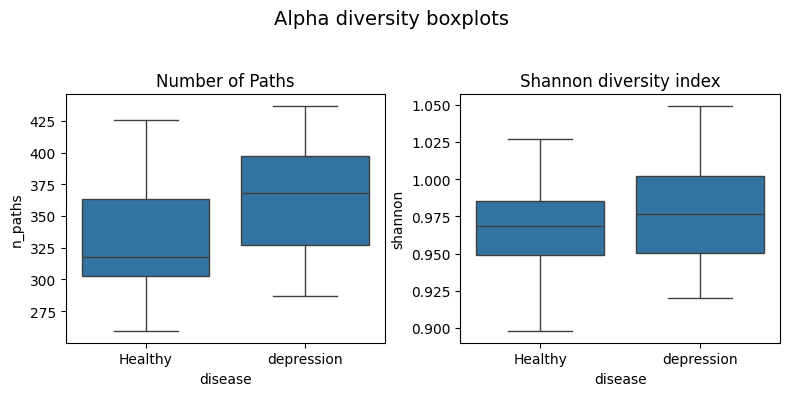

In [276]:
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(data=alpha_diversity_path, 
            x = 'disease', 
            y = 'n_paths', 
           ax=axes[0])


sns.boxplot(data=alpha_diversity_path, 
            x = 'disease', 
            y = 'shannon', 
           ax=axes[1])

axes[0].set_title('Number of Paths')
axes[1].set_title('Shannon diversity index')

plt.suptitle('Alpha diversity boxplots \n', fontsize=14)
plt.tight_layout()

In [277]:
control_samples_path = alpha_diversity_path[alpha_diversity_path['disease'] == 'Healthy']
ibd_samples_path = alpha_diversity_path[alpha_diversity_path['disease'] == 'depression']

In [278]:
test_stat_path, pvalue_path = stats.kruskal(control_samples_path.n_paths, ibd_samples_path.n_paths)
print(f"P-value for Kruskal-Wallis test for number of features is = {pvalue_path:.2f}")

P-value for Kruskal-Wallis test for number of features is = 0.02


In [279]:
shannon_control = control_samples_path["shannon"].dropna()
shannon_ibd = ibd_samples_path["shannon"].dropna()

test_stat, pvalue = stats.kruskal(shannon_control, shannon_ibd)

print(f"P-value for Kruskal-Wallis test for Shannon diversity is = {pvalue:.5f}")


P-value for Kruskal-Wallis test for Shannon diversity is = 0.31046


## Beta diversity

### Beta diversity quantifies the between-sample microbial composition differences, showing how communities vary across samples. It is based on distance matrices and common metrics include:

1. Bray-Curtis Dissimilarity – considers species abundance.
2. Jaccard Index – based on presence/absence of species.
3. UniFrac – accounts for phylogenetic differences between communities (weighted or unweighted).

In [280]:
# usuwanie wierszy, które mają same zera

pa_filtered_clean = pa_filtered_rel[~(pa_filtered_rel == 0).all(axis=1)]

sum_rows_rarefied=pa_filtered_clean.sum(axis=1)

pa_filtered_rel = pa_filtered_clean.div(sum_rows_rarefied, axis=0)  #dividing each value in the row by the sum of the row

pa_filtered_rel.sum(axis=1).sort_values()

NCBI_accession
SRR16681849    1.0
SRR16681863    1.0
SRR16681828    1.0
SRR16681839    1.0
SRR15966646    1.0
SRR16681853    1.0
SRR16681858    1.0
SRR16681833    1.0
SRR16681820    1.0
SRR16681843    1.0
SRR15966649    1.0
SRR15966654    1.0
SRR16681834    1.0
SRR16681830    1.0
SRR16681838    1.0
SRR15966660    1.0
SRR15966666    1.0
SRR16681841    1.0
SRR16681845    1.0
SRR16681832    1.0
SRR15966650    1.0
SRR15966659    1.0
SRR16681851    1.0
SRR15966652    1.0
SRR16681831    1.0
SRR16681860    1.0
SRR16681837    1.0
SRR16681840    1.0
SRR16681842    1.0
SRR16681826    1.0
SRR15966647    1.0
SRR16681848    1.0
SRR16681844    1.0
SRR15966667    1.0
SRR16681857    1.0
SRR15966662    1.0
SRR15966661    1.0
SRR15966656    1.0
SRR15966651    1.0
SRR15966653    1.0
SRR16681835    1.0
SRR15966648    1.0
SRR16681825    1.0
SRR16681846    1.0
SRR15966641    1.0
SRR15966655    1.0
SRR16681850    1.0
SRR16681847    1.0
SRR15966645    1.0
SRR16681855    1.0
SRR15966658    1.0
SRR16681854    1

In [281]:
dM_jaccard_path      = squareform(pdist(pa_filtered_rel.astype(bool).astype(int), 'jaccard'))
pcoa_jaccard_path    = pcoa(dM_jaccard_path).samples

/home/PaulinaSk/.local/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:214: RuntimeWarning: The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -0.02150206038298434 whereas the largest positive one is 0.696055844889247.
  warn(


In [282]:
# dM_jaccard_path

In [283]:
dM_braycurtis_path   = squareform(pdist(pa_filtered_rel, 'braycurtis'))
pcoa_braycurtis_path = pcoa(dM_braycurtis_path).samples

/home/PaulinaSk/.local/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:214: RuntimeWarning: The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -0.0007993125032392314 whereas the largest positive one is 0.055615493681062424.
  warn(


In [284]:
# dM_braycurtis_path

In [285]:
dM_euclidean_path    = squareform(pdist(np.log(pa_filtered_rel+1e-3), 'euclidean'))
pcoa_euclidean_path  = pcoa(dM_euclidean_path).samples

In [286]:
# dM_euclidean_path

## PCoA on beta diversity distance matrix

In [287]:
disease_dict_path = dict(zip(metadata.index, metadata.disease))

pcoa_jaccard_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)
pcoa_braycurtis_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)
pcoa_euclidean_path['disease'] = pa_filtered_rel.index.map(disease_dict_path)

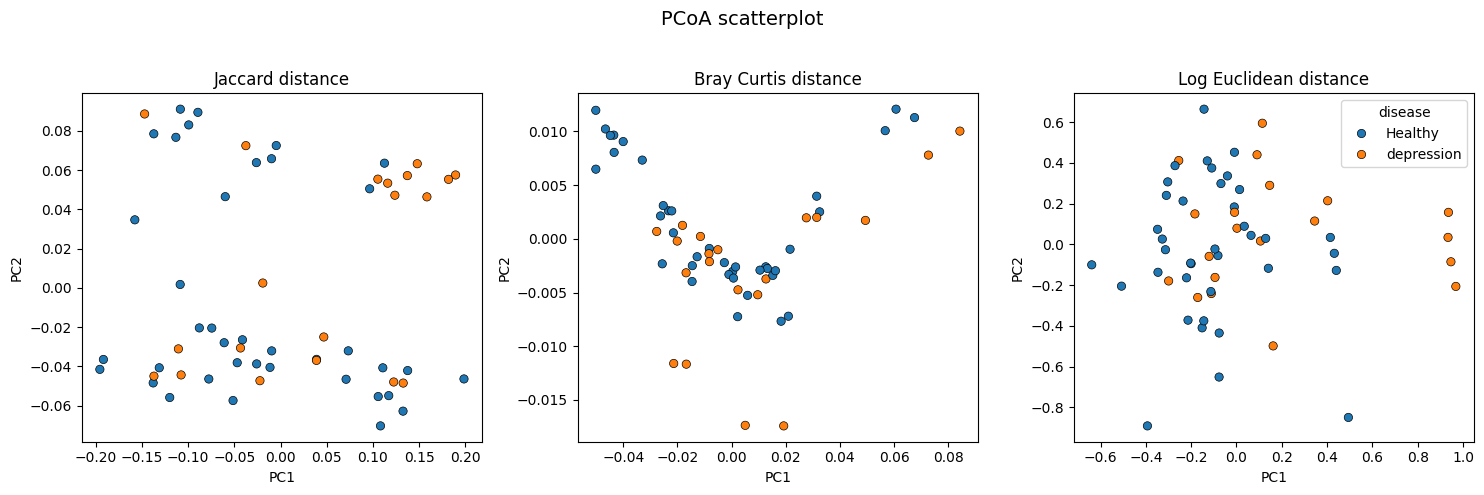

In [288]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# filtrowanie tylko healthy i depression
filt = lambda df: df[df["disease"].isin(["Healthy", "depression"])]

sns.scatterplot(
    data=filt(pcoa_jaccard_path),
    x="PC1", y="PC2",
    edgecolor="k",
    hue="disease",
    legend=False,
    ax=axes[0]
)

sns.scatterplot(
    data=filt(pcoa_braycurtis_path),
    x="PC1", y="PC2",
    edgecolor="k",
    hue="disease",
    legend=False,
    ax=axes[1]
)

sns.scatterplot(
    data=filt(pcoa_euclidean_path),
    x="PC1", y="PC2",
    edgecolor="k",
    hue="disease",
    ax=axes[2]
)

axes[0].set_title("Jaccard distance")
axes[1].set_title("Bray Curtis distance")
axes[2].set_title("Log Euclidean distance")

plt.suptitle("PCoA scatterplot \n", fontsize=14)
plt.tight_layout()


In [289]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import DistanceMatrix
from sklearn.utils import resample

def permdisp(data, metadata, group_col, metric="braycurtis", n_permutations=999, random_state=42):

    dist = pdist(data, metric=metric)
    dist_matrix = DistanceMatrix(squareform(dist), ids=data.index)
    
    groups = metadata.loc[data.index, group_col]
    centroids = {}
    dists_to_centroid = []
    labels = []
    
    for g in groups.unique():
        idx = np.where(groups == g)[0]
        sub_dm = dist_matrix.filter(data.index[idx], strict=False)
        centroid = sub_dm.data.mean(axis=0) 
        # odległości próbki -> centroid
        dist_to_centroid = sub_dm.data.mean(axis=1)
        dists_to_centroid.extend(dist_to_centroid)
        labels.extend([g] * len(dist_to_centroid))
    
    dists_to_centroid = np.array(dists_to_centroid)
    labels = np.array(labels)
    
    # ANOVA-like F
    grand_mean = dists_to_centroid.mean()
    ss_between = sum([len(dists_to_centroid[labels == g]) * 
                      (dists_to_centroid[labels == g].mean() - grand_mean) ** 2 
                      for g in np.unique(labels)])
    ss_within = sum([((dists_to_centroid[labels == g] - 
                       dists_to_centroid[labels == g].mean()) ** 2).sum() 
                     for g in np.unique(labels)])
    
    df_between = len(np.unique(labels)) - 1
    df_within = len(labels) - len(np.unique(labels))
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    F_stat = ms_between / ms_within
    
    # 
    rng = np.random.default_rng(random_state)
    perm_stats = []
    for _ in range(n_permutations):
        perm_labels = rng.permutation(labels)
        ss_between_perm = sum([len(dists_to_centroid[perm_labels == g]) * 
                               (dists_to_centroid[perm_labels == g].mean() - grand_mean) ** 2 
                               for g in np.unique(labels)])
        ms_between_perm = ss_between_perm / df_between
        F_perm = ms_between_perm / ms_within
        perm_stats.append(F_perm)
    
    p_value = (np.sum(np.array(perm_stats) >= F_stat) + 1) / (n_permutations + 1)
    
    result = {
        "method": "PERMDISP",
        "metric": metric,
        "test statistic": F_stat,
        "p-value": p_value,
        "n_perm": n_permutations
    }

    for k, v in result.items():
        print(f"{k}: {v}")


In [290]:
# domyślnie braycurtis
res_bray = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease")

print(" \n")

# jaccard
res_jaccard = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease", metric="jaccard")

print(" \n")

# euclidean
res_euc = permdisp(pa_filtered_rel, metadata_filtered, group_col="disease", metric="euclidean")


method: PERMDISP
metric: braycurtis
test statistic: 0.0251519437389623
p-value: 0.869
n_perm: 999
 

method: PERMDISP
metric: jaccard
test statistic: 1.6697097996763233e+30
p-value: 0.001
n_perm: 999
 

method: PERMDISP
metric: euclidean
test statistic: 0.22579719455581654
p-value: 0.646
n_perm: 999


In [291]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_df = pa_filtered_rel.copy()

# usuń lub uzupełnij braki
features_df = features_df.dropna()  # lub .fillna(features_df.median(numeric_only=True))


# standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df)

# PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_ * 100  # w %
print(f"PC1 tłumaczy: {explained_var[0]:.2f}% wariancji")
print(f"PC2 tłumaczy: {explained_var[1]:.2f}% wariancji")


PC1 tłumaczy: 30.79% wariancji
PC2 tłumaczy: 9.69% wariancji


## PERMANOVA

Test for significant differences between groups using PERMANOVA.

Permutational Multivariate Analysis of Variance (PERMANOVA) is a non-parametric method that tests whether two or more groups of objects (e.g., samples) are significantly different based on a categorical factor. It is conceptually similar to ANOVA except that it operates on a distance matrix, which allows for multivariate analysis. PERMANOVA computes a pseudo-F statistic.

Statistical significance is assessed via a permutation test. The assignment of objects to groups (grouping) is randomly permuted a number of times (controlled via permutations). A pseudo-F statistic is computed for each permutation and the p-value is the proportion of permuted pseudo-F statisics that are equal to or greater than the original (unpermuted) pseudo-F statistic.



In [292]:
grouping_variable_path = pa_filtered_rel.index.map(disease_dict_path)

In [293]:
dM_jaccard_df_path = pd.DataFrame(dM_jaccard_path)

print("Jaccard")

dm_path = DistanceMatrix(dM_jaccard_df_path)
permanova(dm_path, grouping_variable_path)

Jaccard


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      58
number of groups                  2
test statistic             2.966903
p-value                       0.029
number of permutations          999
Name: PERMANOVA results, dtype: object

In [294]:
dM_braycurtis_df_path = pd.DataFrame(dM_braycurtis_path)

print("Bray-Curtis")

dm_path = DistanceMatrix(dM_braycurtis_df_path)
permanova(dm_path, grouping_variable_path)

Bray-Curtis


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      58
number of groups                  2
test statistic             2.332851
p-value                       0.137
number of permutations          999
Name: PERMANOVA results, dtype: object

In [295]:
dM_euclidean_df_path = pd.DataFrame(dM_euclidean_path)

print("Euclidean")

dm_path = DistanceMatrix(dM_euclidean_df_path)
permanova(dm_path, grouping_variable_path)

Euclidean


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      58
number of groups                  2
test statistic             3.362037
p-value                       0.002
number of permutations          999
Name: PERMANOVA results, dtype: object

### Differential abundance - U Mann Whitney test

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.



In [296]:
from scipy.stats import mannwhitneyu

In [297]:
pa_filtered_rel.loc[:, 'disease'] = grouping_variable_path

pathway = pa_filtered_rel.columns[:-1]  

results = []

for path in pathway:
    
    control_samples_path = pa_filtered_rel.loc[pa_filtered_rel['disease'] == 'depression', path]
    ibd_samples_path = pa_filtered_rel.loc[pa_filtered_rel['disease'] == 'Healthy', path]

    control_samples_log_path = np.log(control_samples_path+1e-3)
    ibd_samples_log_path = np.log(ibd_samples_path+1e-3)
    
    stat_path, pvalue_path = mannwhitneyu(control_samples_log_path, ibd_samples_log_path)
    results.append({'pathway': path, 'pvalue': pvalue_path, 'stat': stat_path})

results_df_path = pd.DataFrame(results)

# Adjust pvalues
results_df_path['pvalue_adj'] = stats.false_discovery_control(results_df_path.pvalue)
results_df = np.round(results_df_path, 5)

In [298]:
results_df[results_df['pvalue_adj'] < 0.05].sort_values(by = 'pvalue_adj')

,pathway,pvalue,stat,pvalue_adj
97,"PWY-7237: myo-, chiro- and scyllo-inositol deg...",0.00009,140.0,0.02170
460,PWY-6328: L-lysine degradation X,0.00008,551.0,0.02170
398,PWY-6749: CMP-legionaminate biosynthesis I,0.00019,595.5,0.03062


In [299]:
filtered_results = results_df[results_df['pvalue_adj'] < 0.05]

min_pathway = filtered_results.loc[filtered_results['stat'].idxmin(), 'pathway']
max_pathway = filtered_results.loc[filtered_results['stat'].idxmax(), 'pathway']

print("Ścieżka z najniższą wartością stat:", min_pathway)
print("Ścieżka z najwyższą wartością stat:", max_pathway)


Ścieżka z najniższą wartością stat: PWY-7237: myo-, chiro- and scyllo-inositol degradation
Ścieżka z najwyższą wartością stat: PWY-6749: CMP-legionaminate biosynthesis I
